#                           Students Perfomance Regressor

## Project Detail
* Predicting student performance with the demographic and socioeconomic information.

## Expected Solution
* The solution should contain Jupyter Notebook with prediction accuracy/learning rate. An informative solution should also include statistical testing and information about what contributes the prediction.

## Importing Libraries

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np

# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder

# Matrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# ML Models
import lightgbm as lgb
import xgboost as xg 
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.linear_model import LinearRegression

# Model Tuning 
from bayes_opt import BayesianOptimization

# Feature Importance 
import shap

## Feature Discription
### Target
* math score
* reading score
* writing score
* average score (average of math, reading and writing score)

### Features
* gender
* race/ethnicity
* parental level of education
* lunch
* test preparation course

## Data Preparation
### Read Data - studentsperfomance.csv

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df['average score'] = df[['math score', 'reading score','writing score']].mean(axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [3]:
# data dimension
df.shape

(1000, 9)

* We can see that there are 1000 rows (samples) and 9 columns (features).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   average score                1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [5]:
# Diferential statistics
df.describe()

,math score,reading score,writing score,average score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


## Data Cleaning

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average score                  0
dtype: int64

* There is no missing values

In [7]:
df.duplicated().sum()

0

* No duplicate values

In [8]:
df.nunique()

gender                           2
race/ethnicity                   5
parental level of education      6
lunch                            2
test preparation course          2
math score                      81
reading score                   72
writing score                   77
average score                  194
dtype: int64

* Unique values of each features

## Data Visualization
### Features Visualizaiton

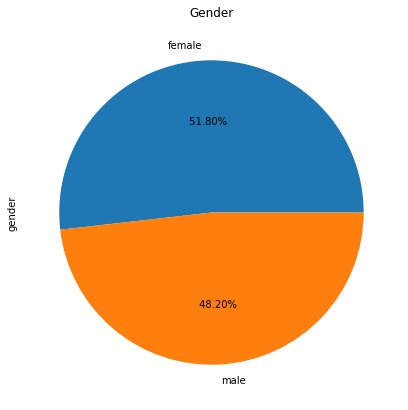

In [9]:
# pie chart of gender with percentage
plt.figure(figsize = (7,7))
plt.title('Gender')
df['gender'].value_counts().plot.pie(autopct = '% .2f%%')

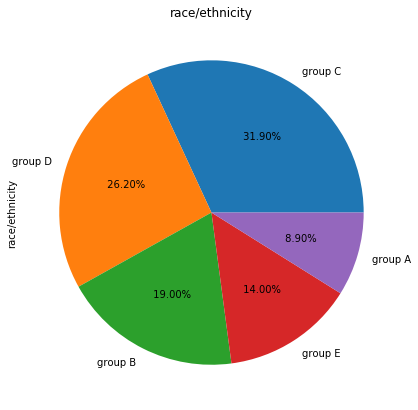

In [10]:
# pie chart of race/ethnicity with percentage
plt.figure(figsize = (7,7))
plt.title('race/ethnicity')
df['race/ethnicity'].value_counts().plot.pie(autopct = '% .2f%%')

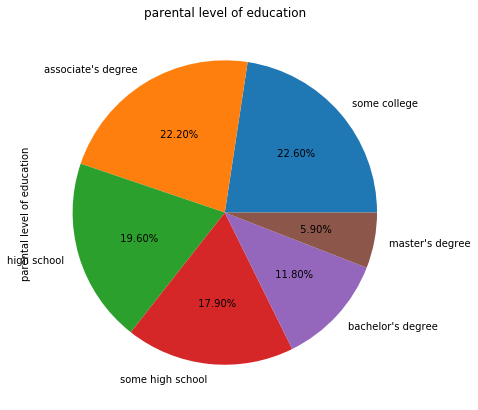

In [11]:
# pie chart of parental level of education with percentage
plt.figure(figsize = (7,7))
plt.title('parental level of education')
df['parental level of education'].value_counts().plot.pie(autopct = '% .2f%%')

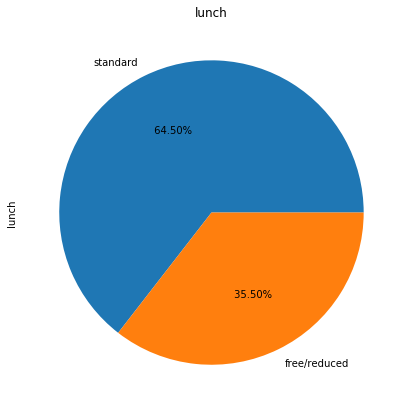

In [12]:
# pie chart of lunch with percentage
plt.figure(figsize = (7,7))
plt.title('lunch')
df['lunch'].value_counts().plot.pie(autopct = '% .2f%%')

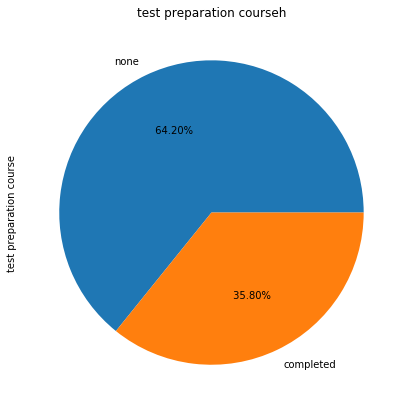

In [13]:
# pie chart of test preparation course with percentage
plt.figure(figsize = (7,7))
plt.title('test preparation courseh')
df['test preparation course'].value_counts().plot.pie(autopct = '% .2f%%')

## Target Visualization

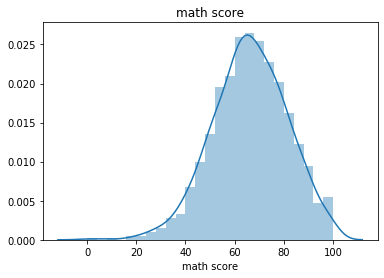

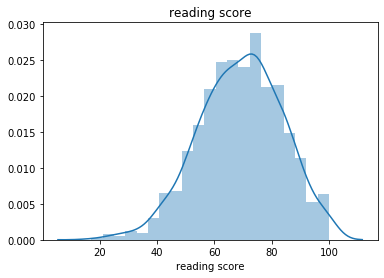

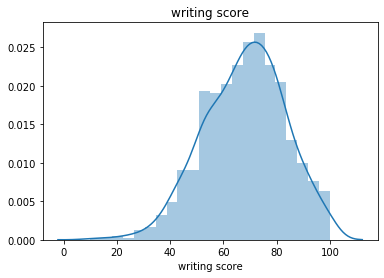

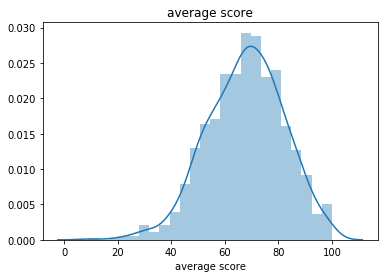

In [14]:
#%% Print the continous features in the dataset 
continous_features = df.select_dtypes(['float64','int64']).columns.to_list()

for cont_feature in continous_features: 
    plt.figure()
    plt.title(cont_feature)
    ax = sns.distplot(df[cont_feature])

## Data Preprocessing 

### Find outliers using boxplot
* Boxplot is used to find outliers

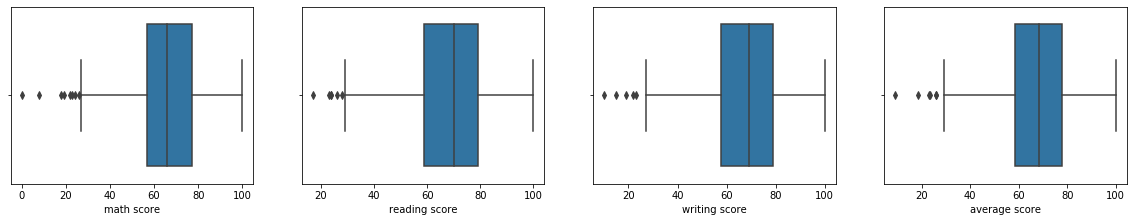

In [15]:
plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(df['math score'])

plt.subplot(4,4,2)
sns.boxplot(df['reading score'])

plt.subplot(4,4,3)
sns.boxplot(df['writing score'])

plt.subplot(4,4,4)
sns.boxplot(df['average score'])

### Removing Outliers
* Outliers can be removed to obtain a better model. Due to this dataset having only 1000 observations.

In [16]:
df['math score'] = df['math score'].clip(lower = df['math score'].quantile(0.05),upper = df['math score'].quantile(0.95))
df['writing score'] = df['writing score'].clip(lower = df['writing score'].quantile(0.05),upper = df['writing score'].quantile(0.95))
df['reading score'] = df['reading score'].clip(lower = df['reading score'].quantile(0.05),upper = df['reading score'].quantile(0.95))
df['average score'] = df['average score'].clip(lower = df['average score'].quantile(0.05),upper = df['average score'].quantile(0.95))

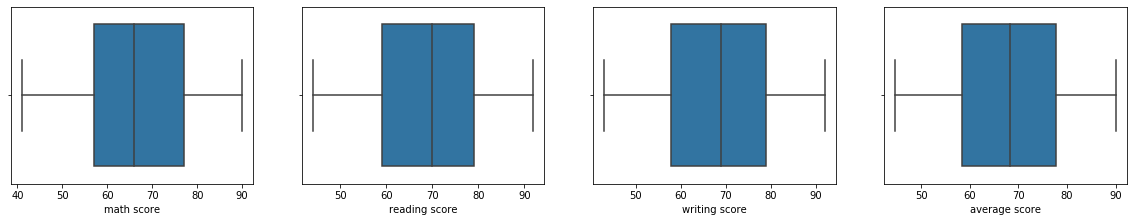

In [17]:
plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(df['math score'])

plt.subplot(4,4,2)
sns.boxplot(df['reading score'])

plt.subplot(4,4,3)
sns.boxplot(df['writing score'])

plt.subplot(4,4,4)
sns.boxplot(df['average score'])

## Dummy Encoding

In [18]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72.0,72,74.0,72.666667
1,female,group C,some college,standard,completed,69.0,90,88.0,82.333333
2,female,group B,master's degree,standard,none,90.0,92,92.0,90.016667
3,male,group A,associate's degree,free/reduced,none,47.0,57,44.0,49.333333
4,male,group C,some college,standard,none,76.0,78,75.0,76.333333


In [19]:
dummies = pd.get_dummies(data = df,columns = ['gender','race/ethnicity','parental level of education','lunch','test preparation course'],
                         drop_first = True)
dummies = dummies.drop(['math score','reading score','writing score','average score'],axis = 1)
merged = pd.concat([df,dummies],axis = 'columns')
final = merged.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'],axis = 'columns')
df = final

## Split Data
- x - Independent variables
- y - Dependent/target column

In [20]:
x = df.drop(columns=['average score'])
y = df.iloc[:,3]

## Train-Test Split
- 20% for testing and 80% for training

## Initial Models
We can apply different machine learning algorthims to test which model perform better on this dataset. I have listed below various machine learning techniques applied in this section.

1. RandomForest
2. Support Vector Machine
3. XGBoost
4. Linear Regression

In [21]:
from sklearn.metrics import classification_report

In [22]:
def classify(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)
    
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    print('score: ',model.score(x_test,y_test)*100)
    
    score = cross_val_score(model,x,y,cv=5)
    print('cv score: ',np.mean(score)*100)
    
    print('MSE: ',mean_squared_error(y_test,y_pred))
    
    print('MAE: ',mean_absolute_error(y_test,y_pred))

- RandomForest

In [23]:
model = RandomForestRegressor()
classify(model,x,y)

score:  99.80758547944065
cv score:  99.74997125825199
MSE:  0.3251725277650134
MAE:  0.3970119861111203


- SupportVectorRegression

In [24]:
model = svm.SVR()
classify(model,x,y)

score:  99.77329180388953
cv score:  99.73782003008068
MSE:  0.3831274114863071
MAE:  0.3518378569825555


- LinearRegression

In [25]:
model = LinearRegression()
classify(model,x,y)

score:  99.87279018649424
cv score:  99.83509608910047
MSE:  0.2149792879141043
MAE:  0.2369853242455397


- XGBRegressor

In [26]:
model = xg.XGBRegressor()
classify(model,x,y)

score:  99.81437828999762
cv score:  99.78440023055782
MSE:  0.31369296077070435
MAE:  0.39371613184611026


## Feature Importance
The below listed are the important features

In [27]:
a = pd.DataFrame(model.feature_importances_)
a['feature'] = list(x_train)
a.sort_values(by = 0, ascending = False)

NameError: name 'x_train' is not defined

## Conclusion
Conclusion

- This dataset was easy to work with due to having few features and observations
- Learnt a lot about encoding methods on categorical data
- All model are work very well